In [1]:
import os
import cv2
import numpy as np
from  tqdm import tqdm

REBUILD_DATA = True

class DogVSCats():
    IMG_SIZE = 50
    CATS = "D:\KMUTT\Year 4th\ENE490 DL\Coding\PetImages\Cat"
    DOGS = "D:\KMUTT\Year 4th\ENE490 DL\Coding\PetImages\Dog"
    LABELS = {CATS: 0, DOGS: 1}

    training_data = []
    catcount = 0
    dogcount = 0

    def make_training_data(self):
        for label in self.LABELS:
            print(label)
            for f in tqdm(os.listdir(label)):
                try:
                    path = os.path.join(label, f)
                    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
                    img = cv2.resize(img, (self.IMG_SIZE, self.IMG_SIZE))
                    self.training_data.append([np.array(img), np.eye(2)[self.LABELS[label]]])
                    self.training_data = np.array(self.training_data, dtype=object)

                    if label == self.CATS:
                        self.catcount += 1
                    elif label == self.DOGS:
                        self.dogcount += 1
                except Exception as e:
                    pass
                    # print(str(e))
        np.random.shuffle(self.training_data)
        np.save("train_data.npy", self.training_data, allow_pickle=True)
        print("Cats: ", self.catcount)
        print("Dogs: ", self.dogcount)

if REBUILD_DATA:
    dogsvcats = DogVSCats()
    dogsvcats.make_training_data()

<>:10: SyntaxWarning: invalid escape sequence '\K'
<>:11: SyntaxWarning: invalid escape sequence '\K'
<>:10: SyntaxWarning: invalid escape sequence '\K'
<>:11: SyntaxWarning: invalid escape sequence '\K'
C:\Users\Spieg\AppData\Local\Temp\ipykernel_38840\3331596956.py:10: SyntaxWarning: invalid escape sequence '\K'
  CATS = "D:\KMUTT\Year 4th\ENE490 DL\Coding\PetImages\Cat"
C:\Users\Spieg\AppData\Local\Temp\ipykernel_38840\3331596956.py:11: SyntaxWarning: invalid escape sequence '\K'
  DOGS = "D:\KMUTT\Year 4th\ENE490 DL\Coding\PetImages\Dog"


D:\KMUTT\Year 4th\ENE490 DL\Coding\PetImages\Cat


100%|██████████| 12501/12501 [00:08<00:00, 1396.60it/s]


D:\KMUTT\Year 4th\ENE490 DL\Coding\PetImages\Dog


100%|██████████| 12501/12501 [00:09<00:00, 1356.75it/s]

Cats:  1
Dogs:  0


In [ ]:
REBUILD_DATA = True # set to true to one once, then back to false unless you want to change something in your training data.

class DogsVSCats():
    IMG_SIZE = 50
    CATS = "D:\KMUTT\Year 4th\ENE490 DL\Coding\PetImages\Cat"
    DOGS = "D:\KMUTT\Year 4th\ENE490 DL\Coding\PetImages\Dog"
    # TESTING = "PetImages/Testing"
    LABELS = {CATS: 0, DOGS: 1}
    training_data = []

    catcount = 0
    dogcount = 0

    def make_training_data(self):
        for label in self.LABELS:
            print(label)
            for f in tqdm(os.listdir(label)):
                if "jpg" in f:
                    try:
                        path = os.path.join(label, f)
                        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
                        img = cv2.resize(img, (self.IMG_SIZE, self.IMG_SIZE))
                        self.training_data.append([np.array(img), np.eye(2)[self.LABELS[label]]])  # do something like print(np.eye(2)[1]), just makes one_hot 
                        #print(np.eye(2)[self.LABELS[label]])

                        if label == self.CATS:
                            self.catcount += 1
                        elif label == self.DOGS:
                            self.dogcount += 1

                    except Exception as e:
                        pass
                        #print(label, f, str(e))

        np.random.shuffle(self.training_data)
        np.save("training_data.npy", self.training_data)
        print('Cats:',dogsvcats.catcount)
        print('Dogs:',dogsvcats.dogcount)

if REBUILD_DATA:
    dogsvcats = DogsVSCats()
    dogsvcats.make_training_data()

In [2]:
training_data = np.load("train_data.npy", allow_pickle=True)

In [6]:
print(len(training_data))
print(training_data[0][0])

1
[[171 180 186 ... 220 213 207]
 [172 179 186 ... 220 215 211]
 [171 179 181 ... 219 217 215]
 ...
 [133 137 140 ...   5   4   4]
 [129 133 136 ...   3   3   3]
 [126 130 134 ...   2   2   2]]


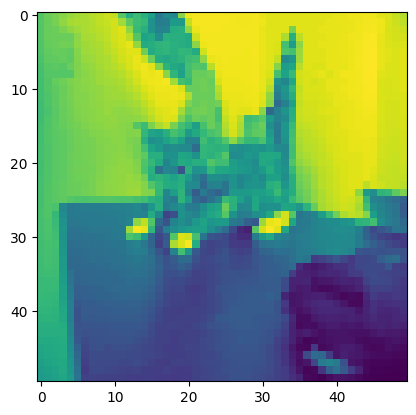

In [7]:
import matplotlib.pyplot as plt

plt.imshow(training_data[0][0])
plt.show()